## 随机森林

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')

In [3]:
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

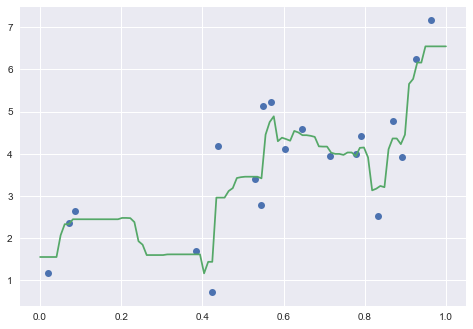

In [4]:
model = RandomForestRegressor()
model.fit(X, y)
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)
plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

In [5]:
n_estimators = [int(x) for x in np.arange(1,2000,1)]
min_samples_split = [int(x) for x in np.arange(1,10,1)]
min_samples_leaf = [int(x) for x in np.arange(1,10,1)]
max_depth = [int(x) for x in np.arange(1,10,1)]
max_features = ['auto','sqrt']
bootstrap = [True,False]
random_params_group = {'n_estimators':n_estimators,
                      'min_samples_split':min_samples_split,
                      'min_samples_leaf':min_samples_leaf,
                      'max_depth':max_depth,
                      'max_features':max_features,
                      'bootstrap':bootstrap}
random_model = RandomizedSearchCV(model,param_distributions=random_params_group,n_iter=100,scoring='neg_mean_squared_error',verbose=2,n_jobs=-1,cv=3,random_state=0)
random_model.fit(X, y)
random_model.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-3.06844308 -1.64213808 -3.08499555 -3.06844308         nan -3.07257043
 -1.86472643 -2.774986           nan -3.07837106 -1.64176899 -1.48319133
 -3.07890821 -1.63059685 -3.06844308 -2.81758882 -3.05959112 -1.92725107
 -2.21595196         nan -3.06844308 -3.05796037 -1.79837687         nan
         nan -1.57930629 -3.06756332 -1.63059685 -3.09104201 -2.28121217
 -2.08694829 -1.57930629 -2.82923058 -2.02323667 -3.06844308 -1.74448542
         nan -3.05517365 -2.82923058 -1.69900425 -3.0596159  -3.06227326
         nan -1.22710004 -2.01291228 -3.06844308         nan -3.05040663
 -2.01291228 -3.05509792         nan -1.74448542 -3.1071425  -3.06844308
 -2.02323667 -1.9104782  -3.10634119 -3.11517647 -1.67879577 -2.7526841
 -1.60383729 -3.05778155 -1.57930629 -3.06844308         nan -3.06844308
 -1.57930629 -1.67879577 -2.82019744 -1.92725107 -3.06844308 -3.069

{'n_estimators': 1220,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

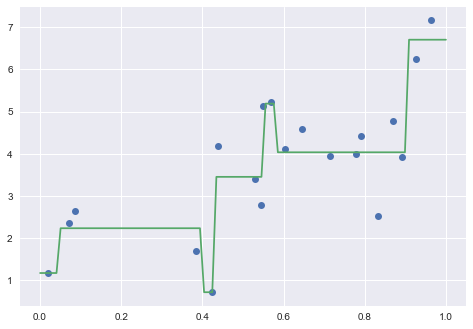

In [6]:
model = RandomForestRegressor(
    n_estimators = 1220,
    min_samples_split = 4,
    min_samples_leaf = 1,
    max_features = 'sqrt',
    max_depth = 4,
    bootstrap = False)
model.fit(X, y)
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)
plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

> 参考链接: https://zhuanlan.zhihu.com/p/252684707

## PCA

In [7]:
from sklearn import datasets

In [8]:
iris = datasets.load_iris()
X = iris.data

In [9]:
# 数据标准化
mean = X.mean(axis=0)
sigma = X.std(axis=0)
shape = X.shape
for i in range(shape[0]):
    for j in range(shape[1]):
        X[i,j] = round((X[i,j]-mean[j])/sigma[j],3)

In [10]:
# 计算相关系数矩阵
r = np.zeros((shape[1],shape[1]))
for i in range(shape[1]):
    for j in range(shape[1]):
        r[i,j] = round(np.sum(X[:,i]*X[:,j]) / (shape[0]-1),3)

In [11]:
# 特征向量
eig = np.linalg.eig(r)[0]

In [12]:
# 贡献率
p = np.zeros(shape[1])
for i in range(shape[1]):
    p[i] = round(eig[i] / sum(eig),3)
print(p)

[0.729 0.229 0.037 0.005]
